# auto-mpg-dataset

In [1]:
#Criação de paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'

In [2]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') #definindo estilo dos graficos

In [3]:
#versões utilizadas das bibliotecas
print('Versão do Pandas',pd.__version__)
print('Versão do Matplotlib' ,matplotlib.__version__)
print('Versão do seaborn',sns.__version__)

Versão do Pandas 2.1.4
Versão do Matplotlib 3.8.0
Versão do seaborn 0.12.2


In [4]:
#carregando dados
data = pd.read_csv('mpg_final.csv')
data

,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,chevelle malibu,18.0,307.0,130.0,3504.0,12.0
1,usa,8,70,low,buick,skylark 320,15.0,350.0,165.0,3693.0,11.5
2,usa,8,70,medium,plymouth,satellite,18.0,318.0,150.0,3436.0,11.0
3,usa,8,70,low,amc,rebel sst,16.0,304.0,150.0,3433.0,12.0
4,usa,8,70,medium,ford,torino,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...
387,usa,4,82,medium,ford,mustang gl,27.0,140.0,86.0,2790.0,15.6
388,europe,4,82,high,volkswagen,pickup,44.0,97.0,52.0,2130.0,24.6
389,usa,4,82,high,dodge,rampage,32.0,135.0,84.0,2295.0,11.6
390,usa,4,82,medium,ford,ranger,28.0,120.0,79.0,2625.0,18.6


##  Verificação dos Dados

In [5]:
#verificar dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        392 non-null    object 
 1   cylinders     392 non-null    int64  
 2   model_year    392 non-null    int64  
 3   mpg_level     392 non-null    object 
 4   car_company   392 non-null    object 
 5   car_name      390 non-null    object 
 6   mpg           392 non-null    float64
 7   displacement  392 non-null    float64
 8   horsepower    392 non-null    float64
 9   weight        392 non-null    float64
 10  acceleration  392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 33.8+ KB


**Observações**

* existem duas variaveis que precisam ser convertidas de int para str
* variavel 'car_name' possui 2 valores nulos

In [6]:
#converter as variaveis 'cylinders' e 'model_year' para o tipo 'object'
data['cylinders'] = data['cylinders'].astype(str)
data['model_year'] = data['model_year'].astype(str)

In [7]:
#exibindo dados nulos
print('Exibindo Valores Nulos')
display(data.loc[data['car_name'].isnull()])
print('\n')

display(f'Percentual de Valores Nulos no Dataset:{len(data.loc[data.car_name.isnull()])/len(data):.2%}')
print('\n')

print('Filtro por car_company = subaru')
display(data.query("car_company == 'subaru'"))

print('Os valores nulos serão preenchidos com a moda da variavel car_name onde o car_company for igual a subaru')

Exibindo Valores Nulos


,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
148,japan,4,74,medium,subaru,NaN,26.0,108.0,93.0,2391.0,15.5
342,japan,4,81,high,subaru,NaN,32.3,97.0,67.0,2065.0,17.8


'Percentual de Valores Nulos no Dataset:0.51%'



Filtro por car_company = subaru


,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
148,japan,4,74,medium,subaru,NaN,26.0,108.0,93.0,2391.0,15.5
237,japan,4,77,high,subaru,dl,30.0,97.0,67.0,1985.0,16.4
328,japan,4,80,high,subaru,dl,33.8,97.0,67.0,2145.0,18.0
342,japan,4,81,high,subaru,NaN,32.3,97.0,67.0,2065.0,17.8


Os valores nulos serão preenchidos com a moda da variavel car_name onde o car_company for igual a subaru


In [8]:
#tratando os dados nulos

#atribuindo a moda a uma variavel
moda = data.query("car_company == 'subaru'")['car_name'].mode()

#substituindo os valores nulos
data['car_name'].fillna(moda[0],inplace=True)

#verificando
data.query("car_company == 'subaru'")

,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
148,japan,4,74,medium,subaru,dl,26.0,108.0,93.0,2391.0,15.5
237,japan,4,77,high,subaru,dl,30.0,97.0,67.0,1985.0,16.4
328,japan,4,80,high,subaru,dl,33.8,97.0,67.0,2145.0,18.0
342,japan,4,81,high,subaru,dl,32.3,97.0,67.0,2065.0,17.8


# Analise Exploratoria dos Dados

## Analise de variaveis categoricas

In [9]:
#criando dataset com as variaveis categoricas

cats = list(data.select_dtypes(include=['object']).columns)
dfcat = data[cats]
dfcat

,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,medium,ford,torino
...,...,...,...,...,...,...
387,usa,4,82,medium,ford,mustang gl
388,europe,4,82,high,volkswagen,pickup
389,usa,4,82,high,dodge,rampage
390,usa,4,82,medium,ford,ranger


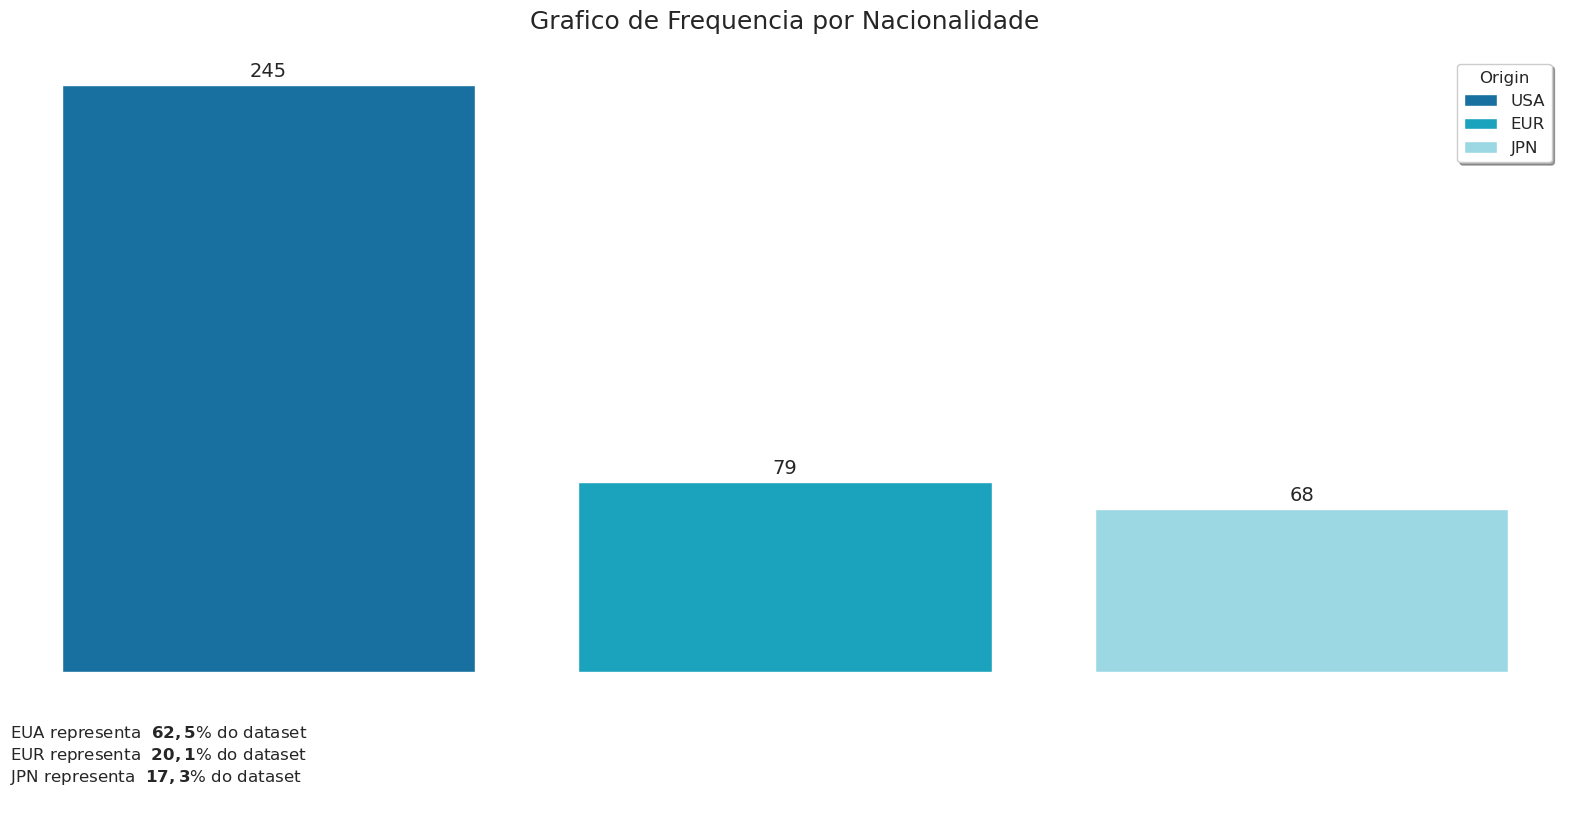

In [10]:
#grafico de frequencia de nacionalidade

def origin_viz():
    #definindo tamanho da figura,tema e cores
    fig,ax = plt.subplots(figsize=(20,8))
    sns.set_theme(style="white")
    cores = [AZUL2, AZUL3, AZUL4]
    #construindo grafico
    ax = sns.countplot(dfcat,x='origin',label=['USA','EUR','JPN'],palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Grafico de Frequencia por Nacionalidade',fontsize=18,loc='center',y=1.03)
    ax.legend(loc='upper right',title='Origin',title_fontsize = 12, fontsize = 12,shadow=True)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(0, -0.15,
            'EUA representa  $\\bf{62,5}$% do dataset \n'
            'EUR representa  $\\bf{20,1}$% do dataset \n'
            'JPN representa  $\\bf{17,3}$% do dataset \n'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')


ax = origin_viz()


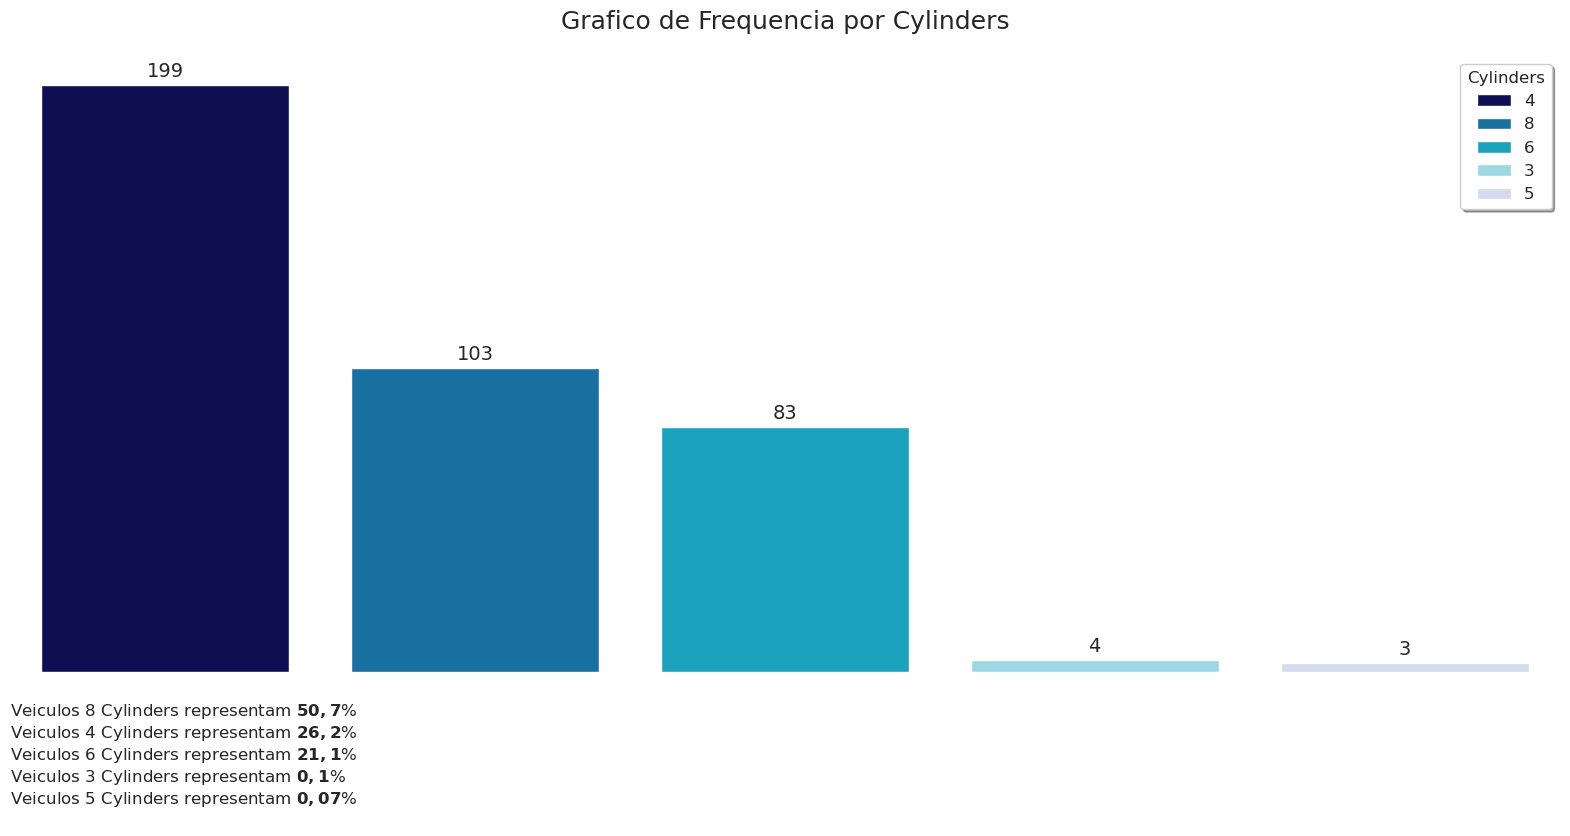

In [11]:
#grafico de frequencia de cylinders

def cylinders_viz():
    #definindo tamanho da figura,tema e cores
    fig,ax = plt.subplots(figsize=(20,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
    #construindo grafico
    ax = sns.countplot(data=dfcat,x='cylinders',order=dfcat['cylinders'].value_counts().index,label=dfcat['cylinders'].value_counts().index,palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Grafico de Frequencia por Cylinders',fontsize=18,loc='center',y=1.03)
    ax.legend(loc='upper right',title='Cylinders',title_fontsize = 12, fontsize = 12,shadow=True)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(0, -0.15,
                'Veiculos 8 Cylinders representam $\\bf{50,7}$%\n'
                'Veiculos 4 Cylinders representam $\\bf{26,2}$%\n'
                'Veiculos 6 Cylinders representam $\\bf{21,1}$%\n'
                'Veiculos 3 Cylinders representam $\\bf{0,1}$%\n'
                'Veiculos 5 Cylinders representam $\\bf{0,07}$%\n'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')


ax = cylinders_viz()


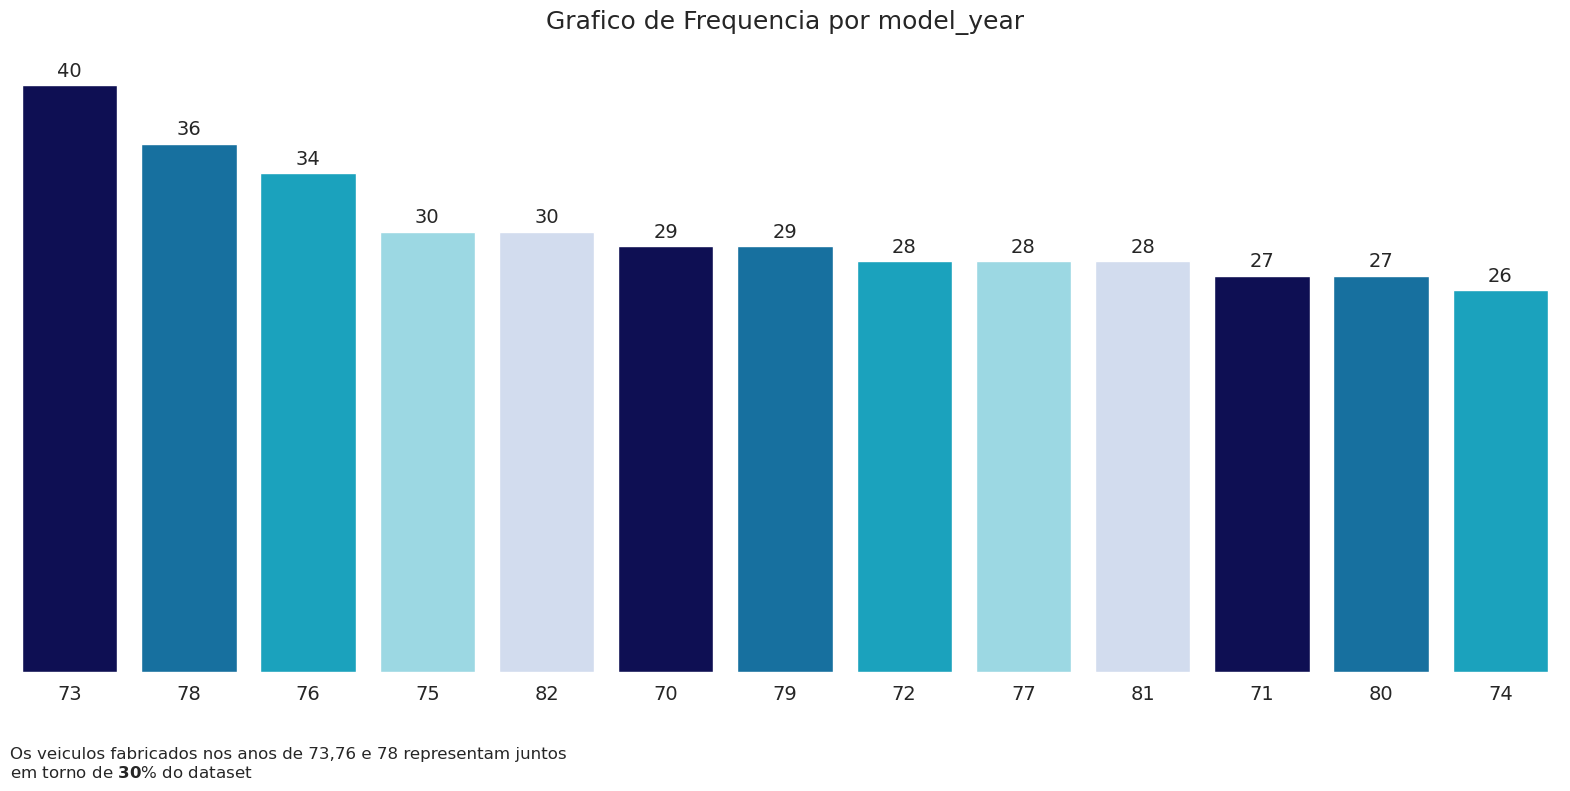

In [12]:
#grafico de frequencia de 'model_year'

def model_year_viz():
    #parametros do grafico
    fig,ax = plt.subplots(figsize=(20,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]    
    #construindo o grafico
    ax = sns.countplot(data=dfcat,x='model_year',order=dfcat['model_year'].value_counts().index,label=dfcat['model_year'].value_counts().index,palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels(labels=list(dfcat['model_year'].value_counts().index),fontsize=14)
    plt.title('Grafico de Frequencia por model_year',fontsize=18,loc='center',y=1.03)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(0, -0.15,
                'Os veiculos fabricados nos anos de 73,76 e 78 representam juntos \nem torno de $\\bf{30}$% do dataset'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')
    
ax = model_year_viz()


In [13]:
#Percentual de model_year
dfcat['model_year'].value_counts(normalize=True)

model_year
73    0.102041
78    0.091837
76    0.086735
75    0.076531
82    0.076531
70    0.073980
79    0.073980
72    0.071429
77    0.071429
81    0.071429
71    0.068878
80    0.068878
74    0.066327
Name: proportion, dtype: float64

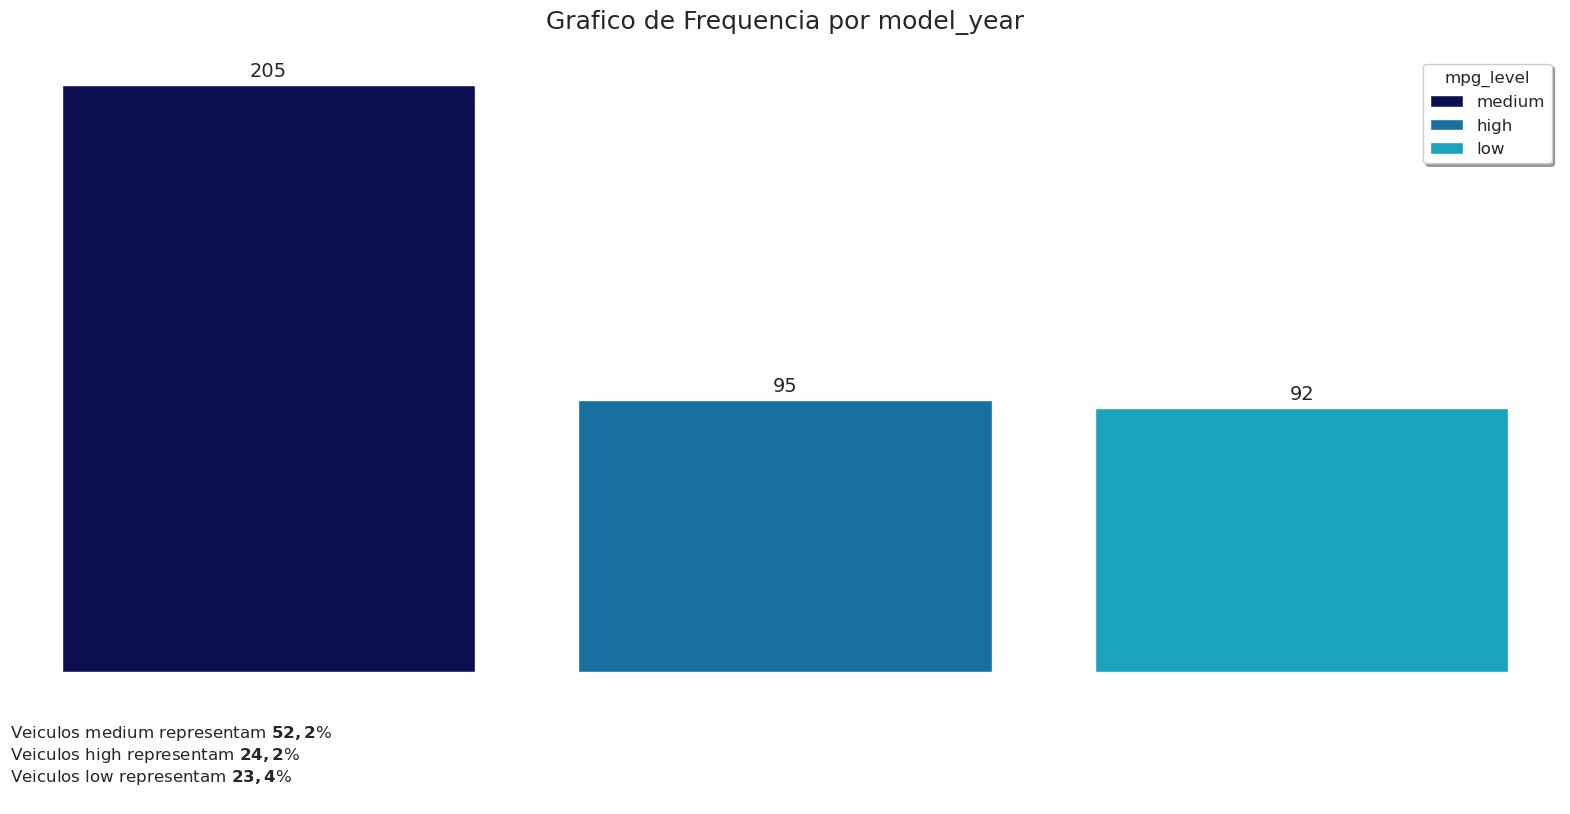

In [14]:
#grafico de frequencia de 'mpg_level'

def mpg_level_viz():
    #parametros do grafico
    fig,ax = plt.subplots(figsize=(20,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
    #construindo o grafico
    ax = sns.countplot(data=dfcat,x='mpg_level',order=dfcat['mpg_level'].value_counts().index,label=dfcat['mpg_level'].value_counts().index,palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Grafico de Frequencia por model_year',fontsize=18,loc='center',y=1.03)
    ax.legend(loc='upper right',title='mpg_level',title_fontsize = 12, fontsize = 12,shadow=True)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(0, -0.15,
                'Veiculos medium representam $\\bf{52,2}$%\n'
                'Veiculos high representam $\\bf{24,2}$%\n'
                'Veiculos low representam $\\bf{23,4}$%\n'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')


ax = mpg_level_viz()


In [15]:
#top10 car_company

#criando dataset com as top10 car_company

company = pd.DataFrame(data['car_company'].value_counts(ascending=False)[0:10])

#criando tabela com top10 car_company relacionadas com a coluna origin

#1 criando tabela com todas as car_company e suas respectivas origin

company_origin = dfcat[['origin','car_company']].groupby(by=['origin','car_company']).count().reset_index()


#2 criando tabela filtrada com o top10 car_company

top10_list = company_origin[company_origin['car_company'].isin(list(data['car_company'].value_counts(ascending=False).index[0:10]))]


display(company,company_origin,top10_list)


,count
car_company,
ford,48
chevrolet,47
plymouth,31
dodge,28
amc,27
toyota,26
datsun,23
volkswagen,22
buick,17


,origin,car_company
0,europe,audi
1,europe,bmw
2,europe,fiat
3,europe,mercedes-benz
4,europe,opel
5,europe,peugeot
6,europe,renault
7,europe,saab
8,europe,triumph
9,europe,volkswagen


,origin,car_company
9,europe,volkswagen
11,japan,datsun
16,japan,toyota
17,usa,amc
18,usa,buick
21,usa,chevrolet
23,usa,dodge
24,usa,ford
28,usa,plymouth
29,usa,pontiac


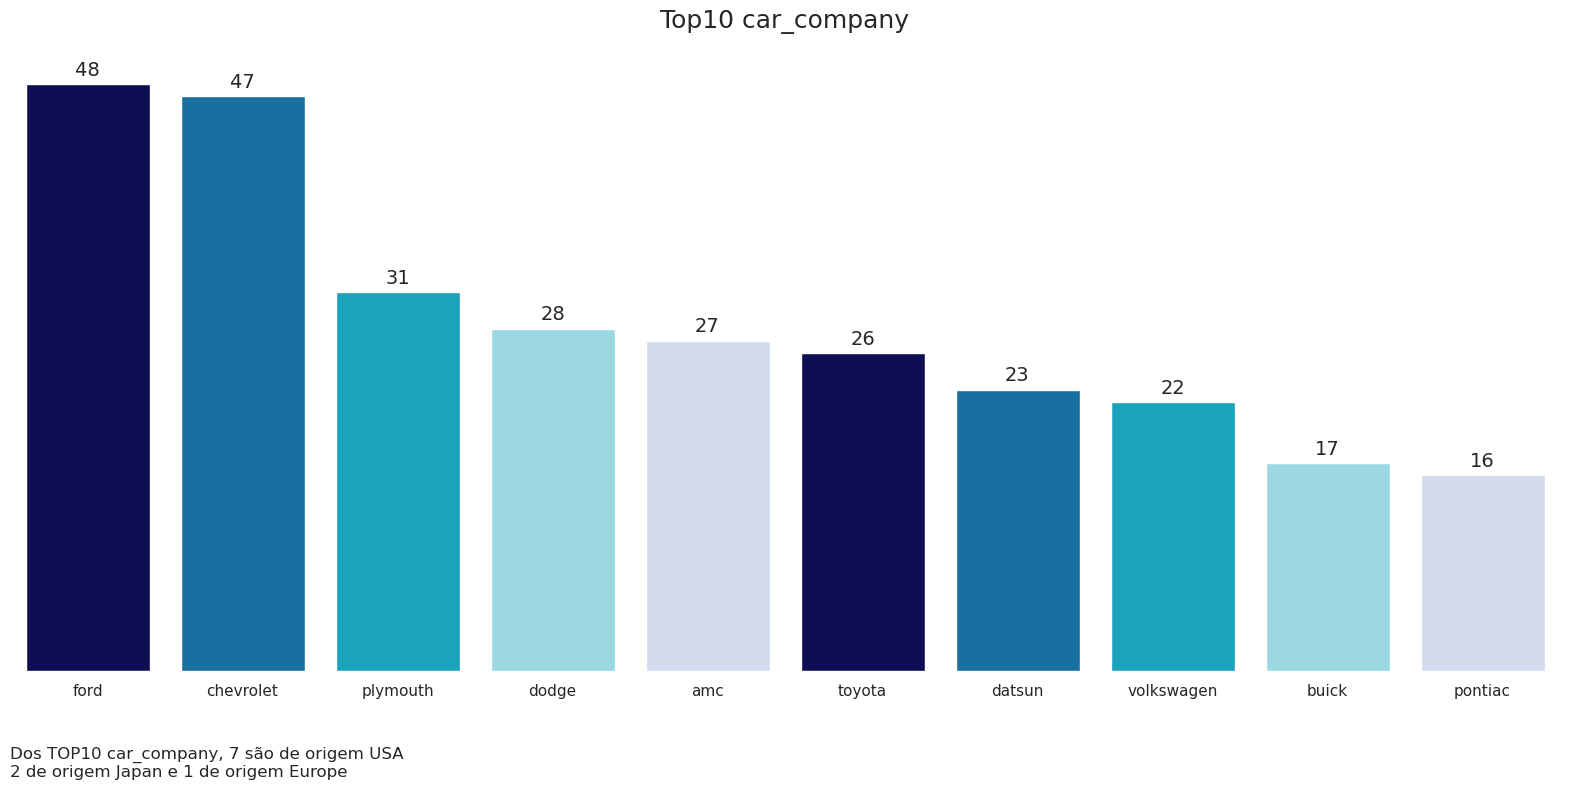

In [16]:
#grafico de frequencia top10 car_company

def car_company_viz():
    #parametros do grafico
    fig,ax = plt.subplots(figsize=(20,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
    #construino o grafico
    ax = sns.barplot(data=company,x=company.index,y='count',palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.title('Top10 car_company',fontsize=18,loc='center',y=1.03)
    ax.text(0, -0.15,
                'Dos TOP10 car_company, 7 são de origem USA\n2 de origem Japan e 1 de origem Europe'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)

car_company_viz()

In [17]:
#inicialmente foram feitas analises simples das variaveis categoricas para sabermos pontos importantes do dataset

## Relação entre variaveis categoricas

In [18]:
#podemos criar as seguintes relações entre as variaveis categoricas

import itertools


combinacoes = list(itertools.combinations(dfcat.columns,2))
combinacoes

[('origin', 'cylinders'),
 ('origin', 'model_year'),
 ('origin', 'mpg_level'),
 ('origin', 'car_company'),
 ('origin', 'car_name'),
 ('cylinders', 'model_year'),
 ('cylinders', 'mpg_level'),
 ('cylinders', 'car_company'),
 ('cylinders', 'car_name'),
 ('model_year', 'mpg_level'),
 ('model_year', 'car_company'),
 ('model_year', 'car_name'),
 ('mpg_level', 'car_company'),
 ('mpg_level', 'car_name'),
 ('car_company', 'car_name')]

Usaremos as seguintes combinações para as vizualizações e insights

('origin', 'cylinders')
('origin', 'mpg_level')
('cylinders', 'mpg_level')
('cylinders', 'car_company') - separado por origin
('mpg_level', 'car_company') - separado por origin
('model_year', 'mpg_level') - fazer


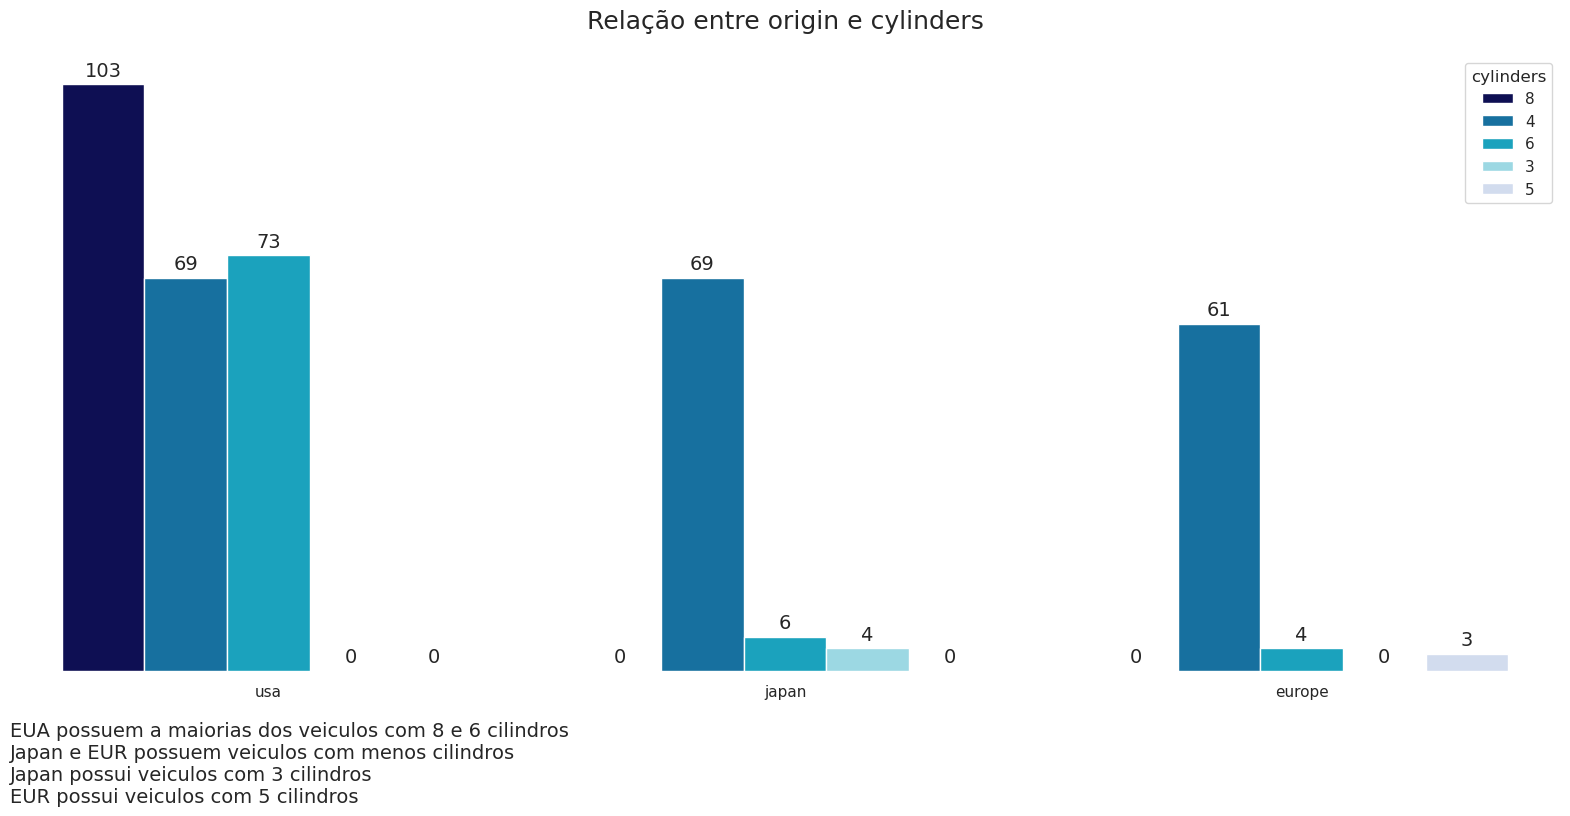

In [19]:
#relação entre origin e cylinders

def origin_cylinders_viz():
        #definindo tamanho da figura e paleta de cores
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
        #construindo o grafico
        ax = sns.countplot(data=dfcat,x='origin',hue='cylinders',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Relação entre origin e cylinders',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'EUA possuem a maiorias dos veiculos com 8 e 6 cilindros \nJapan e EUR possuem veiculos com menos cilindros \nJapan possui veiculos com 3 cilindros \nEUR possui veiculos com 5 cilindros'
                ,transform=ax.transAxes, rotation=0, va='center', ha='left',fontdict={'size':14})
origin_cylinders_viz()

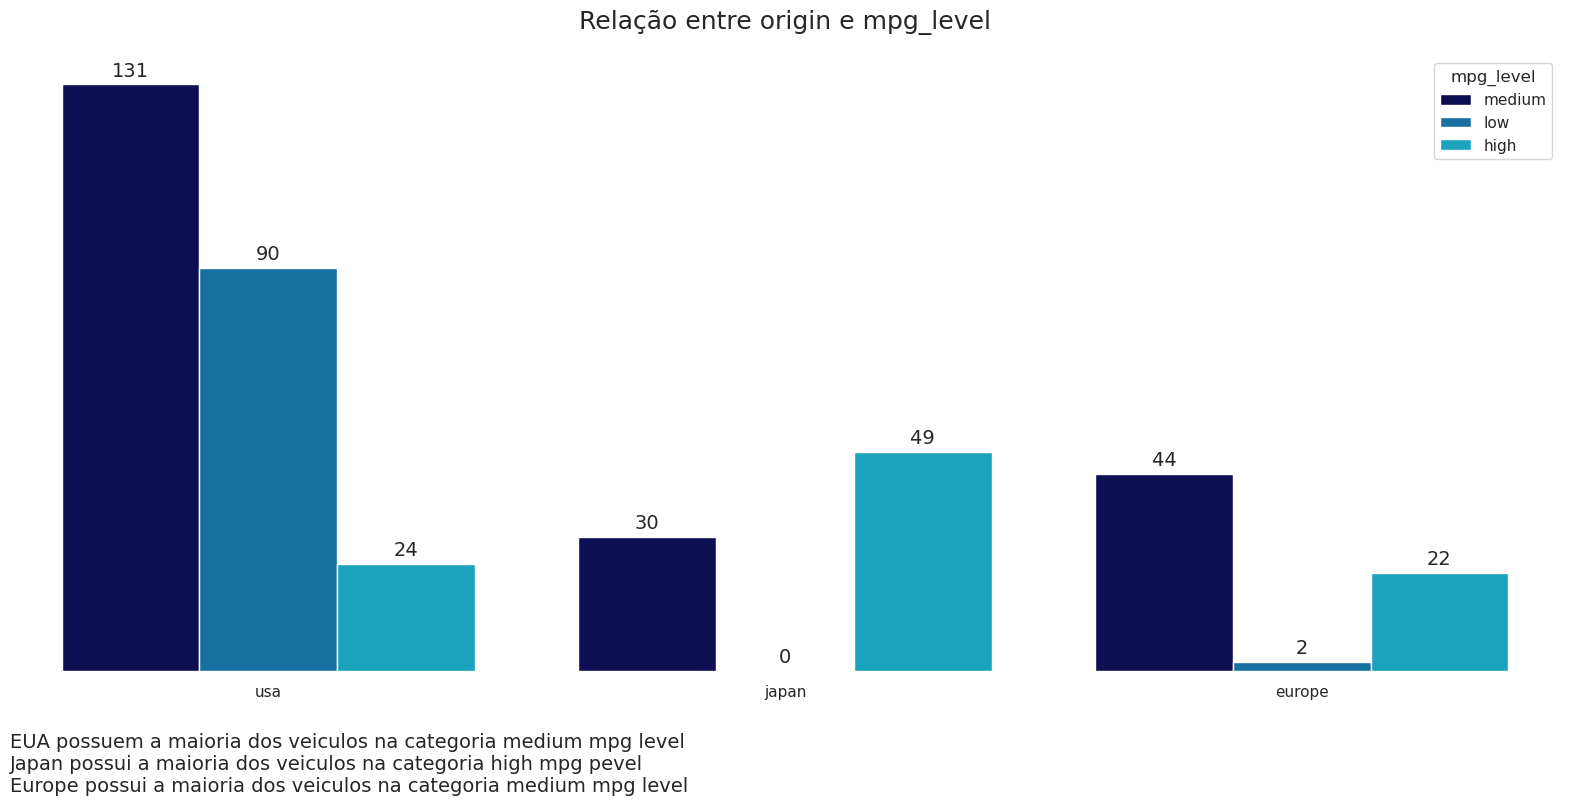

In [20]:
#relação entre origin e mpg_level
def origin_mpglevel_viz():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        cores = [AZUL1, AZUL2, AZUL3]
        sns.set_theme(style="white")
        #construindo o grafico
        ax = sns.countplot(data=dfcat,x='origin',hue='mpg_level',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Relação entre origin e mpg_level',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'EUA possuem a maioria dos veiculos na categoria medium mpg level \nJapan possui a maioria dos veiculos na categoria high mpg pevel \nEurope possui a maioria dos veiculos na categoria medium mpg level'
                ,transform=ax.transAxes, rotation=0, va='center', ha='left',fontdict={'size':14})
origin_mpglevel_viz()

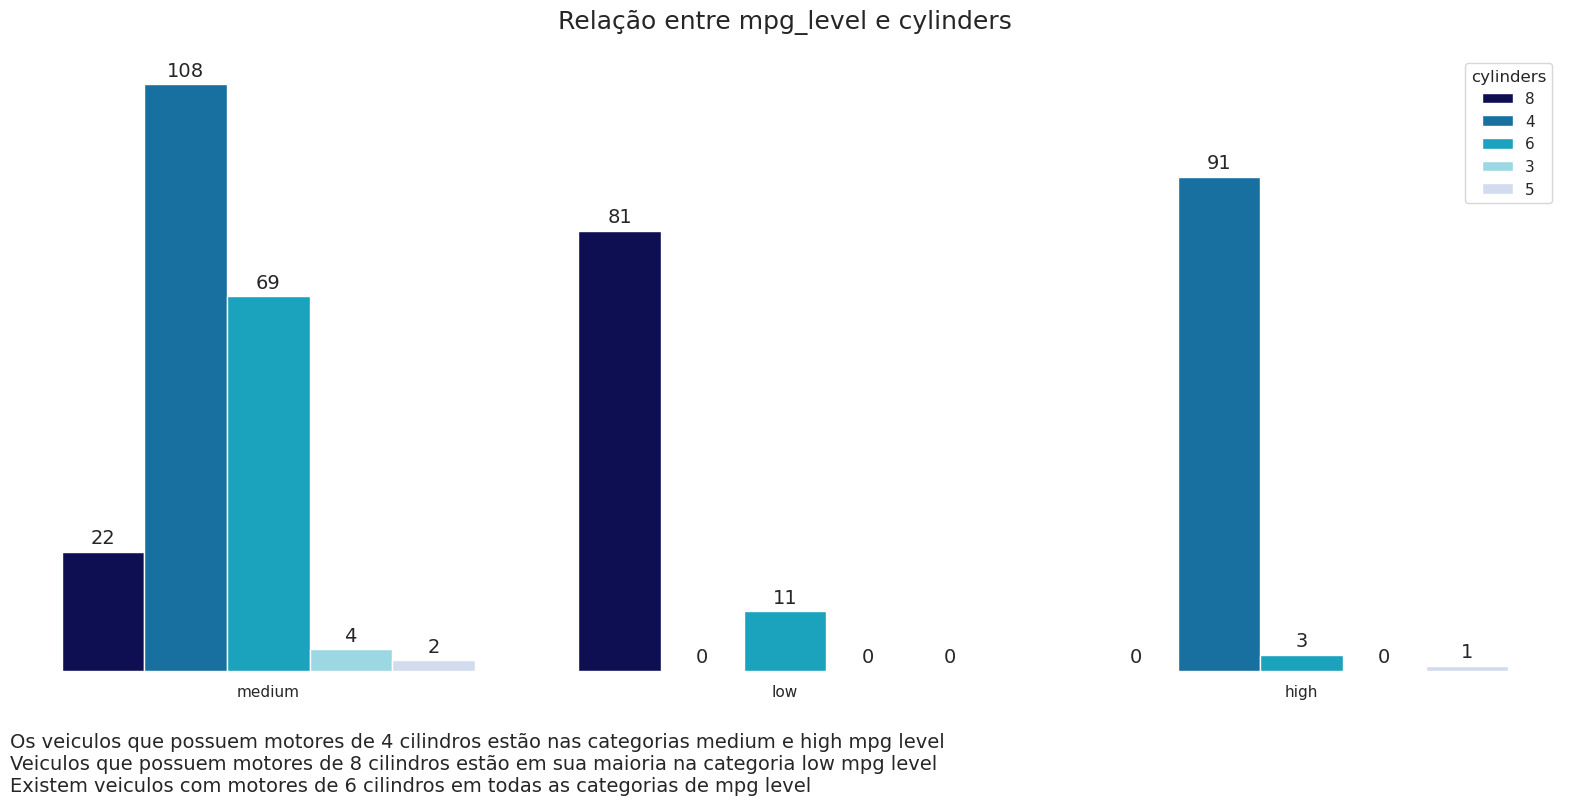

In [21]:
#relação entre mpg_level e cyliders
def mpglevel_cylinders_viz():
        
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
        #construindo o grafico
        ax = sns.countplot(data=dfcat,x='mpg_level',hue='cylinders',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Relação entre mpg_level e cylinders',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'Os veiculos que possuem motores de 4 cilindros estão nas categorias medium e high mpg level \nVeiculos que possuem motores de 8 cilindros estão em sua maioria na categoria low mpg level \nExistem veiculos com motores de 6 cilindros em todas as categorias de mpg level'
                ,transform=ax.transAxes, rotation=0, va='center', ha='left',fontdict={'size':14})
mpglevel_cylinders_viz()

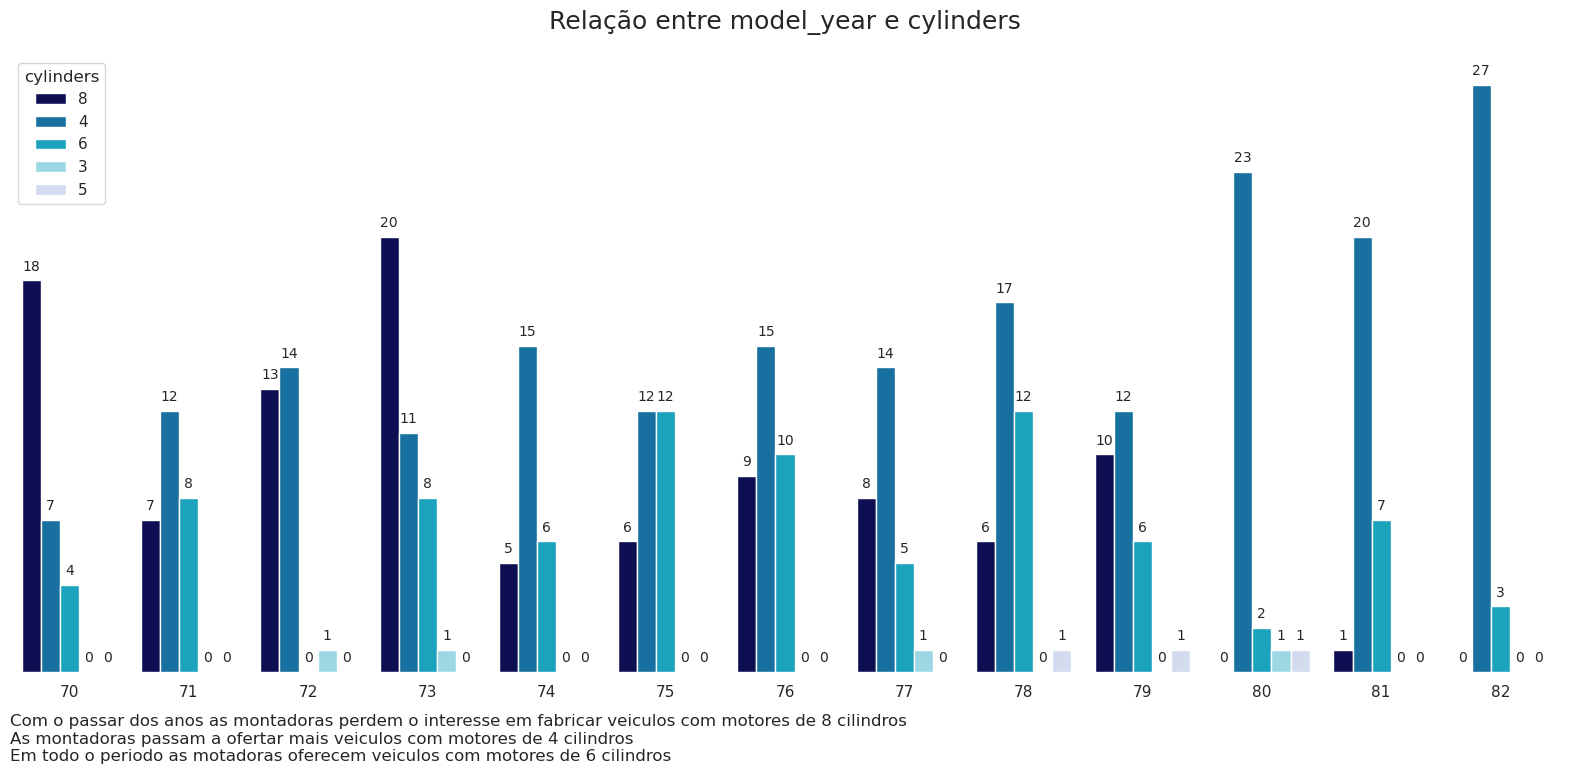

In [22]:
#relação entre model_year e cylinders
def modelyear_cylinders_viz():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
        #construindo o grafico
        ax = sns.countplot(data=dfcat,x='model_year',hue='cylinders',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Relação entre model_year e cylinders',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=10)
        ax.text(0, -0.15,
                        'Com o passar dos anos as montadoras perdem o interesse em fabricar veiculos com motores de 8 cilindros \nAs montadoras passam a ofertar mais veiculos com motores de 4 cilindros \nEm todo o periodo as motadoras oferecem veiculos com motores de 6 cilindros'
                ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')

modelyear_cylinders_viz()

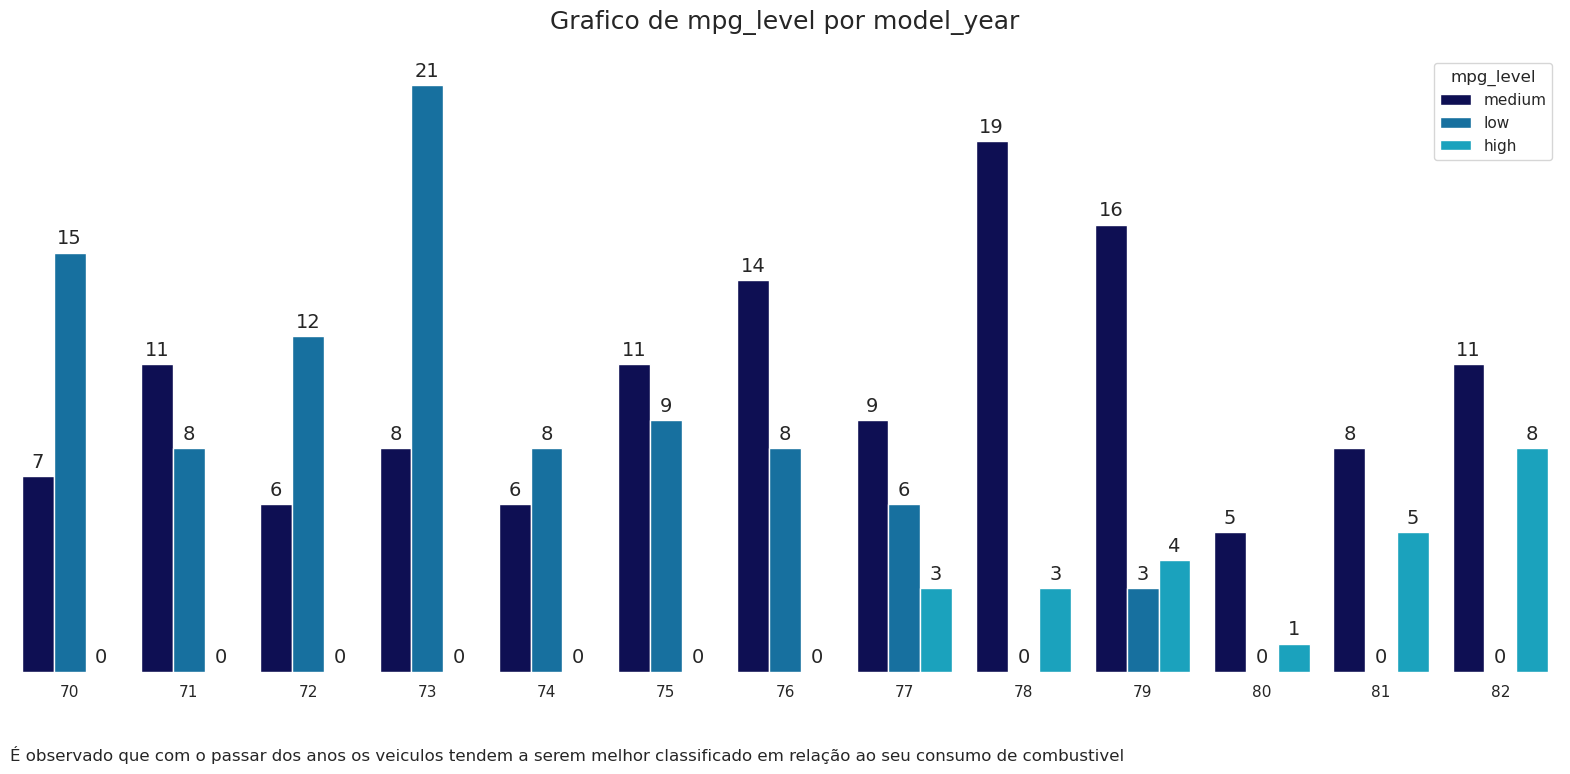

In [23]:
#grafico de mpg_level por model_year
def model_year_mpg_level():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1,AZUL2,AZUL3]
        #construindo o grafico
        ax = sns.countplot(dfcat.query("origin == 'usa'"),x='model_year',hue='mpg_level',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Grafico de mpg_level por model_year',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'É observado que com o passar dos anos os veiculos tendem a serem melhor classificado em relação ao seu consumo de combustivel'
                        ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')
model_year_mpg_level()

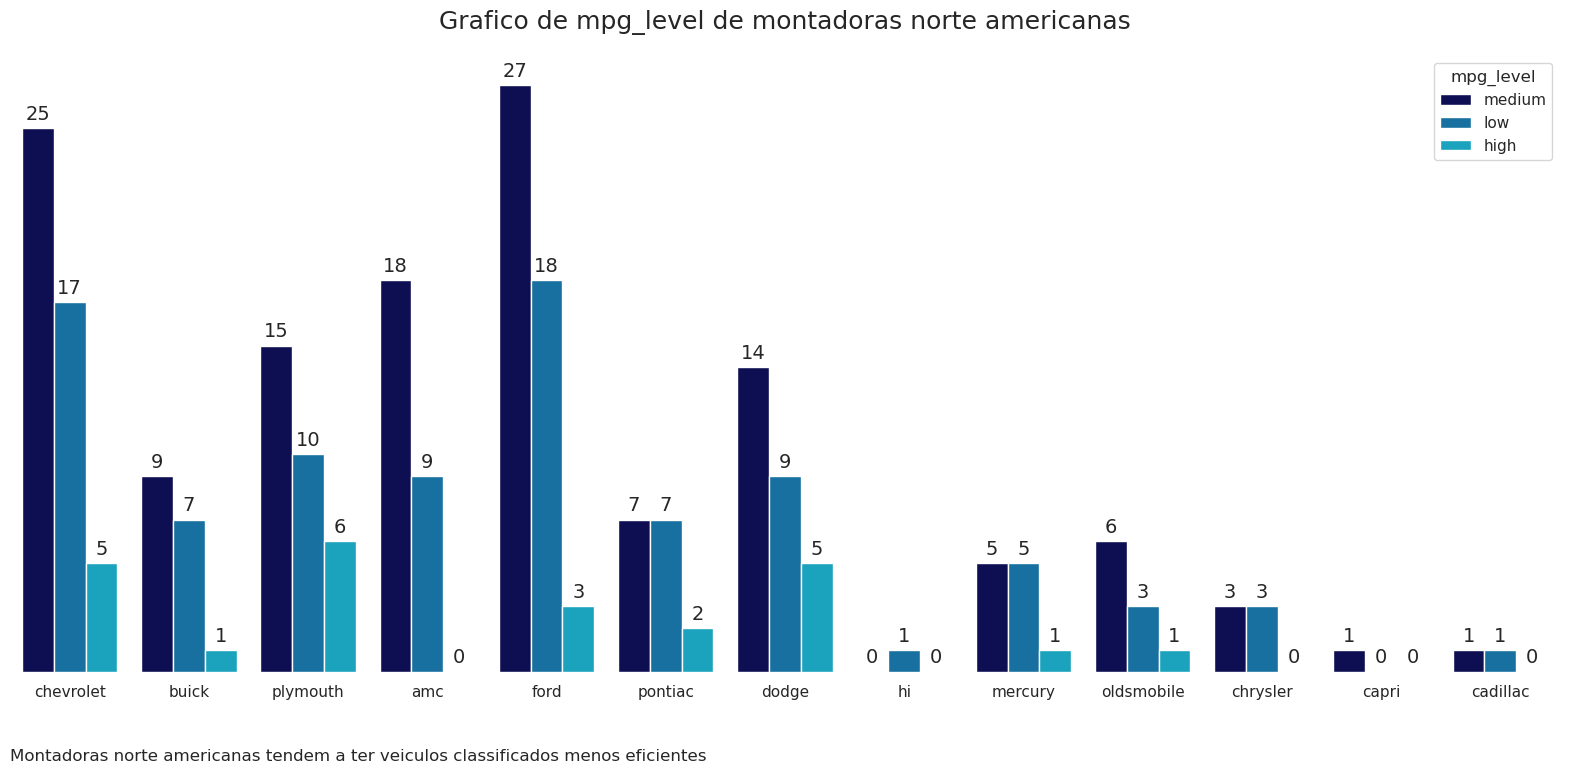

In [24]:
#grafico de mpg_level por origin == usa
def mpg_level_car_company_usa():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1,AZUL2,AZUL3]
        #construindo o grafico
        ax = sns.countplot(dfcat.query("origin == 'usa'"),x='car_company',hue='mpg_level',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Grafico de mpg_level de montadoras norte americanas',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'Montadoras norte americanas tendem a ter veiculos classificados menos eficientes'
                        ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')
mpg_level_car_company_usa()

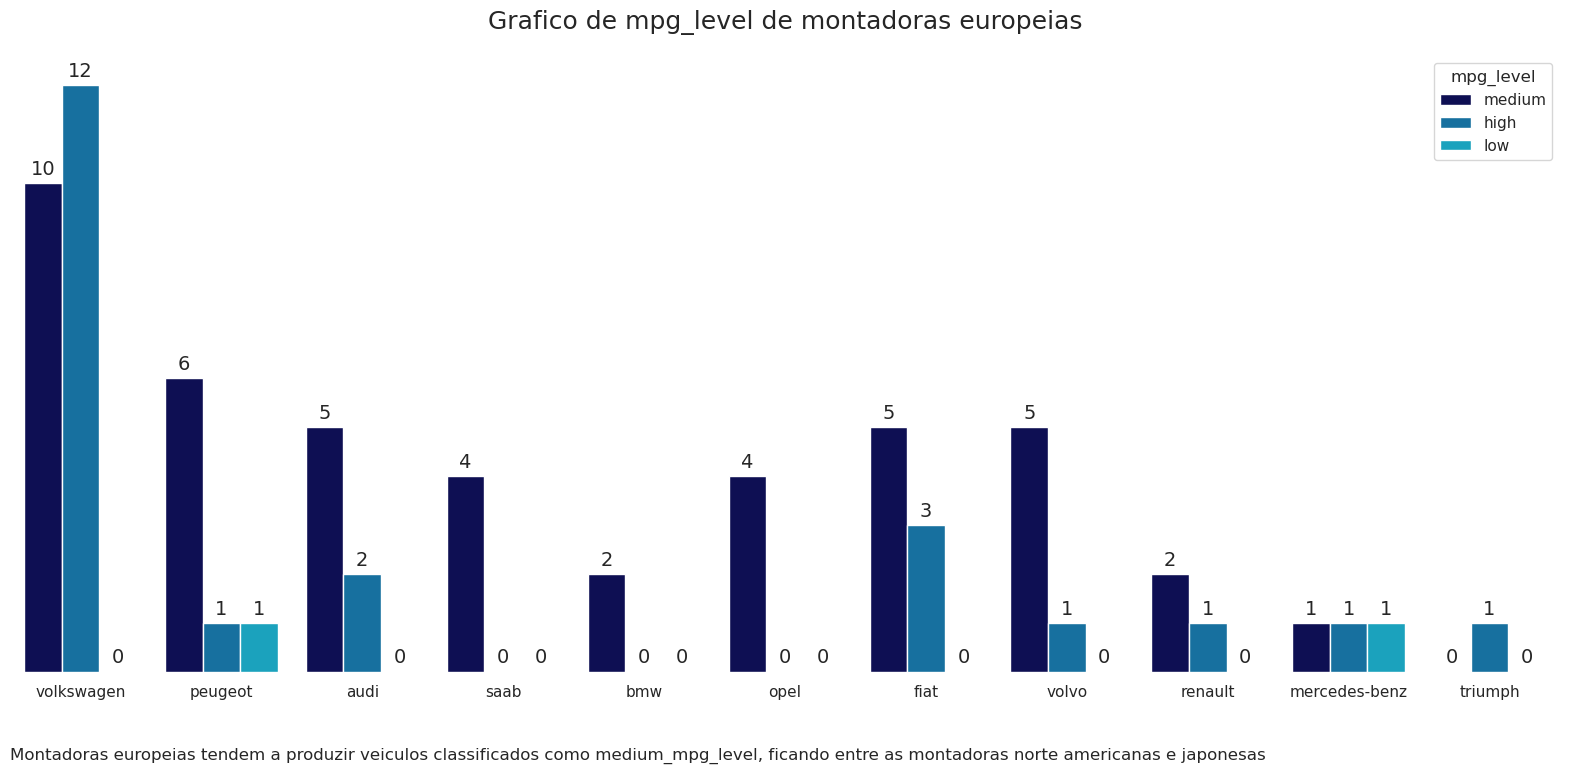

In [25]:
#grafico de mpg_level por origin == europe
def mpg_level_car_company_europe():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1, AZUL2, AZUL3]
        #construindo o grafico
        ax = sns.countplot(dfcat.query("origin == 'europe'"),x='car_company',hue='mpg_level',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Grafico de mpg_level de montadoras europeias',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'Montadoras europeias tendem a produzir veiculos classificados como medium_mpg_level, ficando entre as montadoras norte americanas e japonesas'
                        ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')
mpg_level_car_company_europe()


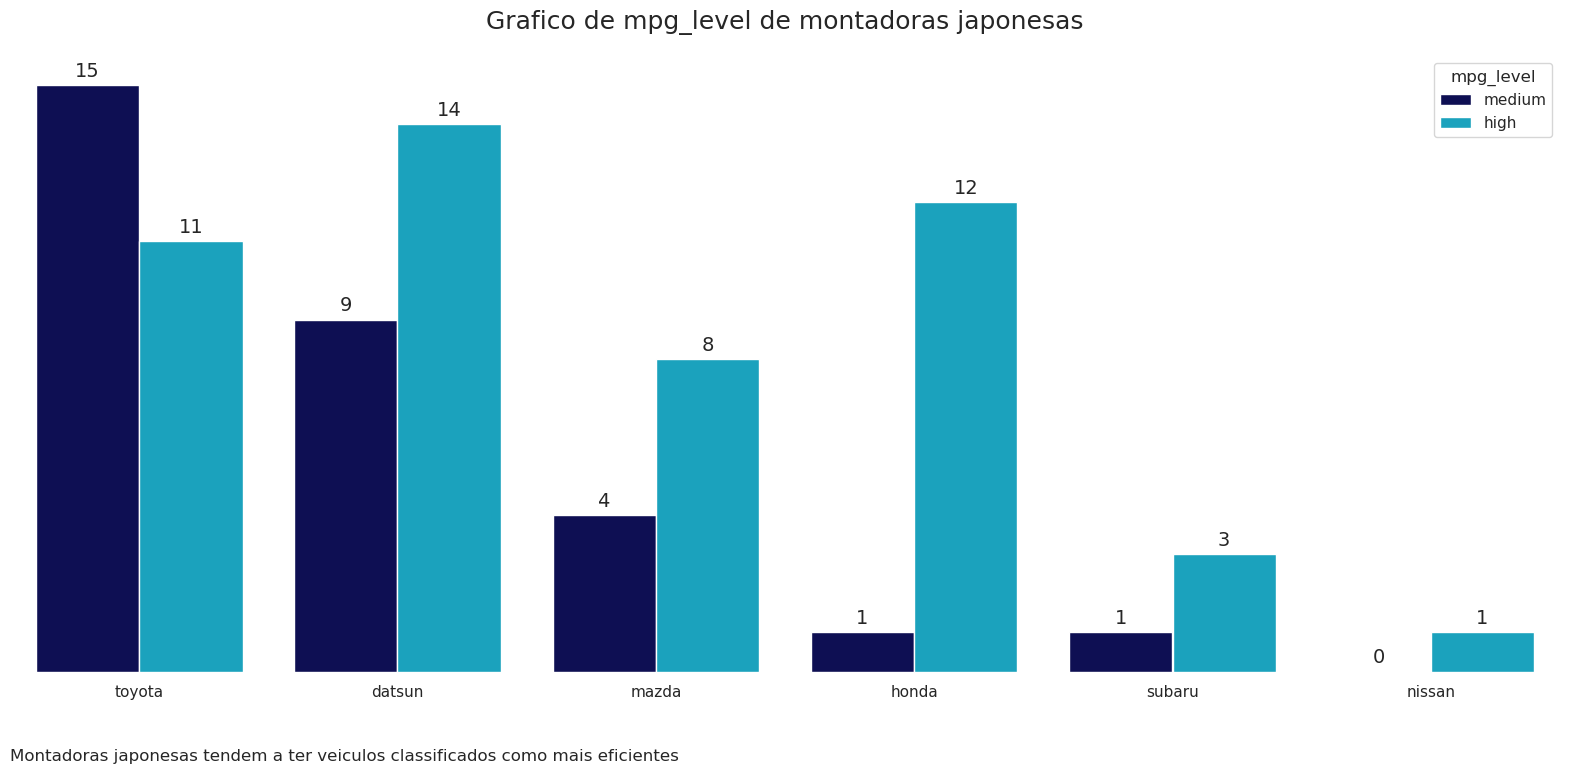

In [26]:
#grafico de mpg_level por origin == japan
def mpg_level_car_company_japan():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1,AZUL3,AZUL5]
        #construindo o grafico
        ax = sns.countplot(dfcat.query("origin == 'japan'"),x='car_company',hue='mpg_level',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Grafico de mpg_level de montadoras japonesas',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'Montadoras japonesas tendem a ter veiculos classificados como mais eficientes'
                        ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')
mpg_level_car_company_japan()

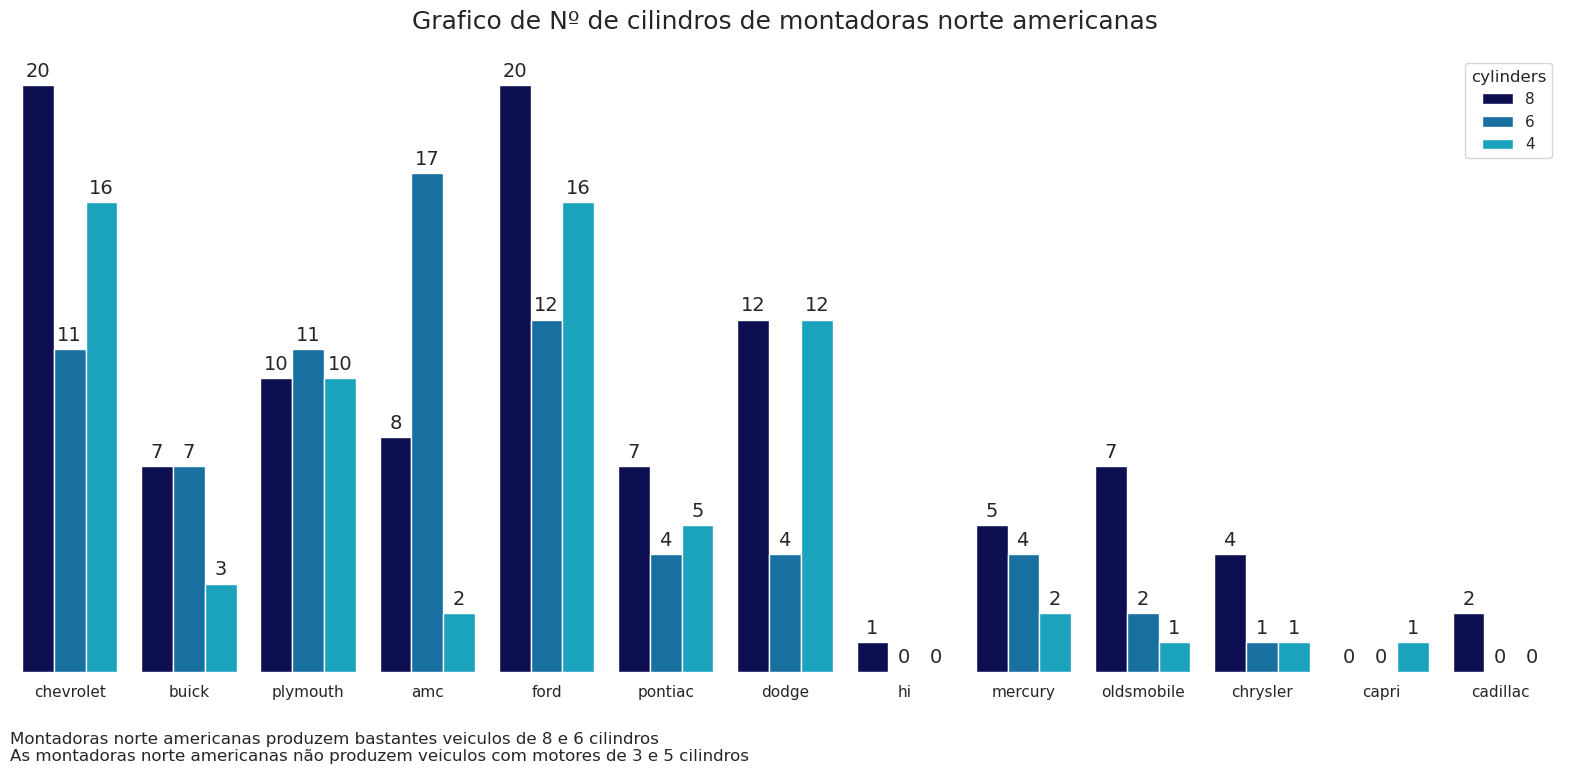

In [27]:
#grafico de cylinders por origin == usa
def cylinders_car_company_usa():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1, AZUL2, AZUL3,AZUL4,AZUL5]
        #construindo o grafico
        ax = sns.countplot(dfcat.query("origin == 'usa'"),x='car_company',hue='cylinders',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Grafico de Nº de cilindros de montadoras norte americanas',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'Montadoras norte americanas produzem bastantes veiculos de 8 e 6 cilindros \nAs montadoras norte americanas não produzem veiculos com motores de 3 e 5 cilindros'
                        ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')
cylinders_car_company_usa()

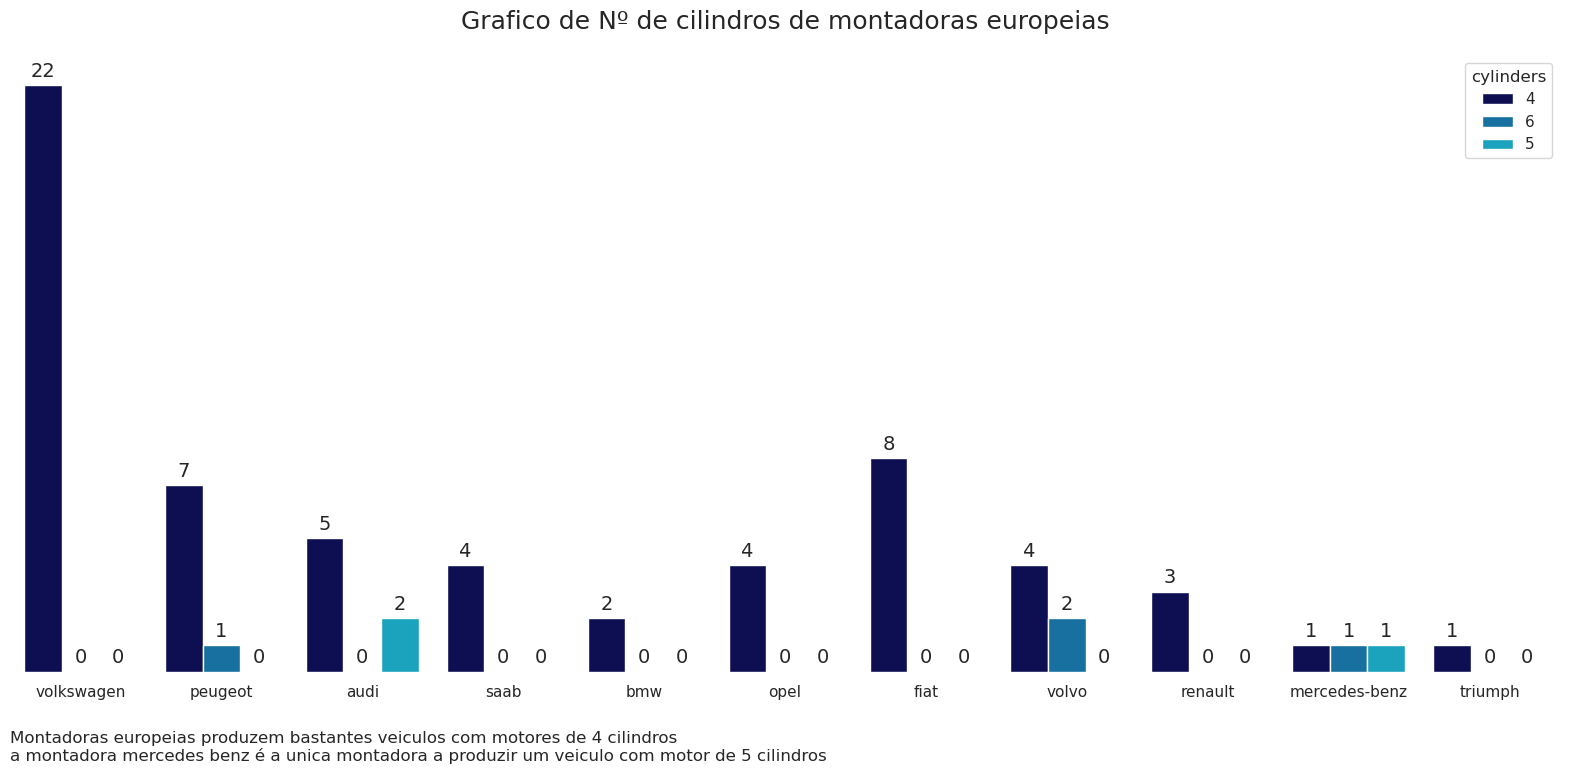

In [28]:
#grafico de cylinders por origin == europe
def cylinders_car_company_europe():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))
        sns.set_theme(style="white")
        cores = [AZUL1, AZUL2, AZUL3,AZUL4,AZUL5]
        #construindo o grafico
        ax = sns.countplot(dfcat.query("origin == 'europe'"),x='car_company',hue='cylinders',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Grafico de Nº de cilindros de montadoras europeias',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'Montadoras europeias produzem bastantes veiculos com motores de 4 cilindros\na montadora mercedes benz é a unica montadora a produzir um veiculo com motor de 5 cilindros'
                        ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')
cylinders_car_company_europe()

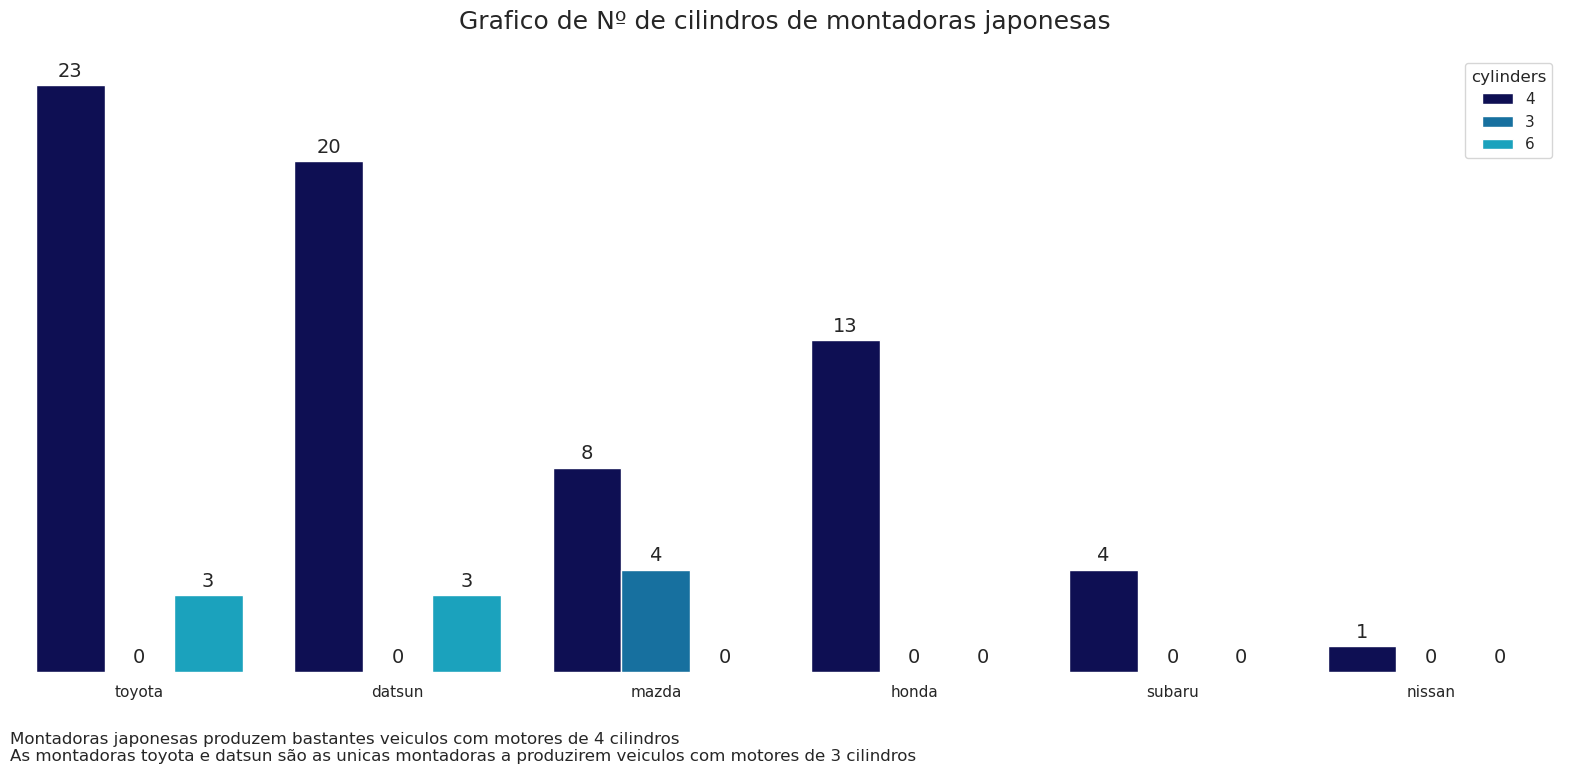

In [29]:
#grafico de cylinders por origin == japan
def cylinders_car_company_japan():
        #definindo tamanho da figura,paleta de cores e tema do grafico
        fig,ax = plt.subplots(figsize=(20,8))        
        sns.set_theme(style="white")
        cores = [AZUL1, AZUL2, AZUL3,AZUL4,AZUL5]
        #construindo o grafico
        ax = sns.countplot(dfcat.query("origin == 'japan'"),x='car_company',hue='cylinders',palette=cores)
        #parametros do grafico
        sns.despine(bottom=True,left=True)
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        plt.title('Grafico de Nº de cilindros de montadoras japonesas',fontsize=18,loc='center',y=1.03)
        for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
        ax.text(0, -0.15,
                        'Montadoras japonesas produzem bastantes veiculos com motores de 4 cilindros \nAs montadoras toyota e datsun são as unicas montadoras a produzirem veiculos com motores de 3 cilindros'
                        ,transform=ax.transAxes, rotation=0, va='bottom', ha='left')
cylinders_car_company_japan()


**Conclusões**
* O foco das montadoras japonesas é a economia de combustivel
* O foco das montadoras norte americanas e produzir motores com maior numero de cilindros
* O foco das montadoras europeias é a tecnologia e a eficiência

obs: 62.5% dos dados do dataset são de veiculos de origem norte americana

Proximo passo:

Agora iremos analisar os dados numericos do dataset para tirarmos mais conclusões
